# Softmax Regression

In [61]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = sns.load_dataset('iris')

In [63]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [65]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
df = df[['sepal_length', 'petal_length', 'species']]

In [67]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [68]:
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 

In [70]:
clf = LogisticRegression(multi_class='multinomial')

In [71]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [72]:
y_pred = clf.predict(X_test)

In [73]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [74]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [75]:
# prediction
query = np.array([[3.4, 2.7]])
clf.predict_proba(query)

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [18]:
clf.predict(query)

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [77]:
clf.intercept_, clf.coef_

(array([ 11.42342195,   1.60314504, -13.02656699]),
 array([[-0.21019189, -2.92367909],
        [ 0.3472753 , -0.3499141 ],
        [-0.13708341,  3.27359318]]))

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


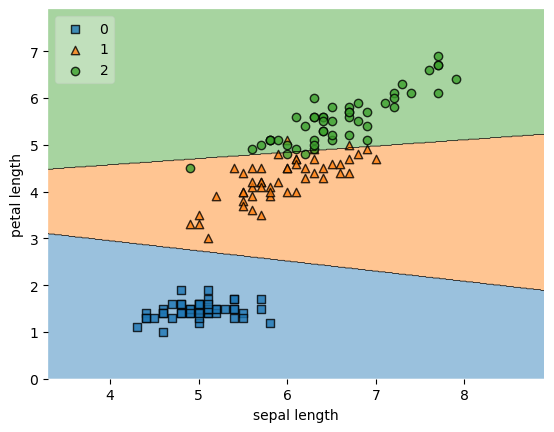

In [19]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.show()

# Creating Own Softmax Function

In [27]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = sns.load_dataset('iris')

In [3]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [6]:
df = df[['sepal_length', 'petal_length', 'species']]

In [7]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [90]:
X = np.array(df.iloc[:,0:2])
y = np.array(df.iloc[:, -1])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 

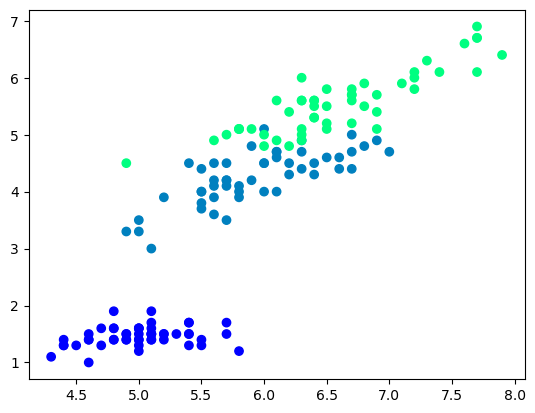

In [92]:
plt.scatter(X[:, 0], X[:, 1], cmap='winter',c=y)

In [93]:
def class_specifier(y, count = 1):
    
    y_new = []
    
    for i in range(count):
        temp = np.array([1 if item == i else 0 for item in y])
        y_new.append(temp)
        
    return np.array(y_new)
            

In [94]:
# desi trick
class DesiSoftmax:
    
    def __init__(self, classes = 1):
        self.classes = classes
        self.intercept_ = None
        self.coef_ = None
    
    def fit(self, X_train, y_train):
        
        y_train = class_specifier(y_train, self.classes)
        
        intercept = []
        coef = []
        
        reg = LogisticRegression()
        
        for i in range(self.classes):
            
            reg.fit(X_train, y_train[i])
            intercept.append(reg.intercept_)
            coef.append(reg.coef_)
            
        self.intercept_ = np.array([item[0] for item in intercept])
        self.coef_ = np.array([item[0] for item in coef])
        
    

In [95]:
reg = DesiSoftmax(3)

In [96]:
reg.fit(X, y)

In [97]:
reg.intercept_ , reg.coef_

(array([  9.70628249,   2.07545656, -15.29231362]),
 array([[-0.37163232, -2.85751569],
        [-0.88634452,  0.62582593],
        [-0.48775471,  3.75759158]]))

In [98]:
 def print_plot(X, y, intercept_, coef_, classes):
        
    plt.scatter(X[:,0], X[:, 1], c=y , cmap='winter')
    
    colors=['red', 'blue', 'green']
    
    for i in range(classes):
        
        m = -(reg.coef_[i][0]/reg.coef_[i][1])
        b = -(reg.intercept_[i]/reg.coef_[i][1])

        X_input = np.linspace(4, 8.5, 100)
        y_input = m * X_input + b

        plt.plot(X_input, y_input, color=colors[i], linewidth=3)
    
    plt.ylim(1, 7)

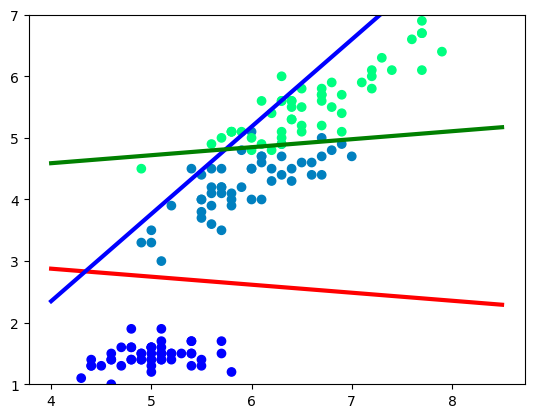

In [99]:
print_plot(X, y, np.array([ 11.42342195,   1.60314504, -13.02656699]),
 np.array([[-0.21019189, -2.92367909],[ 0.3472753 , -0.3499141 ],[-0.13708341,  3.27359318]]), classes=3)

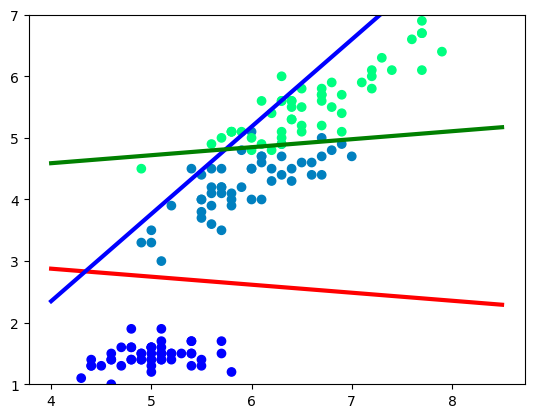

In [100]:
print_plot(X, y, reg.intercept_, reg.coef_, 3)